In [133]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from IPython.display import display

import sys
sys.path.append('/home/galina/PythonProjects/common_functions')
import peptides as pep

% matplotlib inline

# Load data

In [108]:
df = pd.read_csv('1-to-1 Fit and Endpoint  Streptavidin scrubbed length 8 and 9.csv')

columns = ['Set',
           'Curve',
           'Label',
           'Error Code',
           'kon  [1/ (sec.nM)]',
           'Err',
           'koff  [1/sec]',
           'Err.1',
           'Kd  [nM]',
           'Err.2',
           'ThetaBar',
           'Err.3',
           'Scale',
           'Err.4',
           'RMSE Curve',
           'koff_max  [1/sec]',
           'Kd_max  [nM]',
           'koff_best  [1/sec]',
           'Kd_best  [nM]',
           'Assoc. SNR',
           'Assoc. Mean',
           'Dissoc. SNR',
           'Dissoc. Mean',
           'Baseline Noise']

df = df[columns]

rename = {'Set'                : 'Set',
          'Label'              : 'Peptide',
          'Error Code'         : 'Fit Error',
          'kon  [1/ (sec.nM)]' : 'kon',
          'Err'                : 'kon Err',
          'koff  [1/sec]'      : 'koff',
          'Err.1'              : 'koff Err',
          'Kd  [nM]'           : 'Kd',
          'Err.2'              : 'Kd Err',
          'ThetaBar'           : 'Theta Bar',
          'Err.3'              : 'Theta Bar Err',
          'Scale'              : 'Scale',
          'Err.4'              : 'Scale Err',
          'RMSE Curve'         : 'Fit RMSE',
          'koff_max  [1/sec]'  : 'koff max',
          'Kd_max  [nM]'       : 'Kd max',
          'koff_best  [1/sec]' : 'koff best',
          'Kd_best  [nM]'      : 'Kd best',
          'Assoc. SNR'         : 'Assoc SNR',
          'Assoc. Mean'        : 'Assoc Signal',
          'Dissoc. SNR'        : 'Dissoc SNR',
          'Dissoc. Mean'       : 'Dissoc Signal',
          'Baseline Noise'     : 'Baseline Noise'}

df = df.rename(columns = rename)
df['Peptide Weight'] = df['Peptide'].map(pep.weight)
df['Peptide Length'] = df['Peptide'].map(len)

In [109]:
df.head()

,Set,Curve,Peptide,Fit Error,kon,kon Err,koff,koff Err,Kd,Kd Err,...,Kd max,koff best,Kd best,Assoc SNR,Assoc Signal,Dissoc SNR,Dissoc Signal,Baseline Noise,Peptide Weight,Peptide Length
0,0,0,ATHPQFAT,0,0.000005,0.000001,0.000033,0.000004,6.603,1.870,...,2.112,0.000033,6.603,3.099982,0.000825,2.079701,0.000553,0.000266,871.949,8
1,0,1,ATHPQFAT,0,0.000005,0.000001,0.000033,0.000004,6.603,1.870,...,1.408,0.000033,6.603,5.865785,0.001086,4.209834,0.000779,0.000185,871.949,8
2,0,2,ATHPQFAT,0,0.000005,0.000001,0.000033,0.000004,6.603,1.870,...,1.414,0.000033,6.603,5.234234,0.000830,5.072003,0.000804,0.000159,871.949,8
3,1,0,CTHPQFAT,0,0.000004,0.000001,0.000052,0.000004,13.330,3.647,...,2.157,0.000052,13.330,6.570487,0.001053,4.663500,0.000747,0.000160,904.009,8
4,1,1,CTHPQFAT,0,0.000004,0.000001,0.000052,0.000004,13.330,3.647,...,2.083,0.000052,13.330,5.504557,0.001016,3.307565,0.000611,0.000185,904.009,8


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 26 columns):
Set               1054 non-null int64
Curve             1054 non-null int64
Peptide           1054 non-null object
Fit Error         1054 non-null int64
kon               1054 non-null float64
kon Err           1054 non-null float64
koff              1054 non-null float64
koff Err          1054 non-null float64
Kd                1054 non-null float64
Kd Err            1054 non-null float64
Theta Bar         1054 non-null float64
Theta Bar Err     1054 non-null float64
Scale             1054 non-null float64
Scale Err         1054 non-null float64
Fit RMSE          1054 non-null float64
koff max          1054 non-null float64
Kd max            1054 non-null float64
koff best         1054 non-null float64
Kd best           1054 non-null float64
Assoc SNR         1054 non-null float64
Assoc Signal      1054 non-null float64
Dissoc SNR        1054 non-null float64
Dissoc Signal     10

# Data inspection
## Endpoint parameters
### Distribution of Association Signal

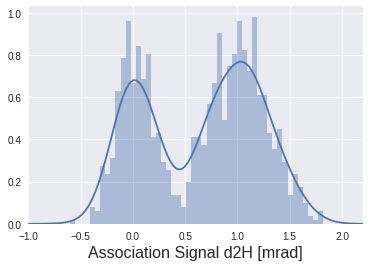

In [111]:
sns.distplot(df['Assoc Signal'] * 1000, bins = 50)
plt.xlim(-1, 2.2)
plt.xlabel('Association Signal d2H [mrad]', fontsize = 16)

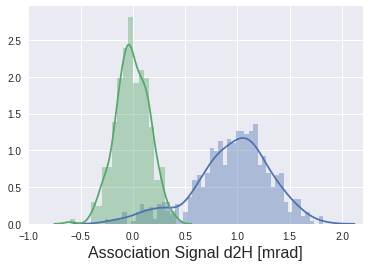

In [114]:
contains_HPQM = df['Peptide'].str.contains(r'HP[QM]')
sns.distplot(df[contains_HPQM]['Assoc Signal'] * 1000, bins = 50)
sns.distplot(df[~contains_HPQM]['Assoc Signal'] * 1000, bins = 20)
plt.xlim(-1, 2.2)
plt.xlabel('Association Signal d2H [mrad]', fontsize = 16)

# Aggregate by peptides

In my KIN file, curves are partitioned by their label (peptide name). Each sets contains curves from the same peptide and curve from the peptide of the same name is put into one set.

I combine my Fit and Endpoint data by peptide name.

In global fit $\mathbf{K_d}$ and $\mathbf{Err(K_d)}$ are the same for each curve in the set, so I can pick any value (I pick first).

**Scale**, **SNR** and **Association Signal** vary from curve to curve within a given set. I pick maximal value in each set (corresponds to strongest reaction among targets of the same peptide type).

### $\mathbf{K_d^{(best)}}$ treatment
I argue that for $\mathbf{K_d^{(best)}}$ I should pick minimal value within a set. Here is my reasoning.

For a given curve, we can calculate $k_{off}^{(max)}$, which corresponds to a detection limit of dissociation rate in a curve with given noise. If this value exceeds $k_{off}$ yielded by a fitting algorith, we assume that $k_{off}$ from the fit is unreliable and report $K_d^{(best)} = \dfrac{k_{off}^{(max)}}{k_{on}}$ as an upper bound of $K_d$ value (it's our detection limit).

If fit value for $k_{off}$ exceeds detection limit of $k_{off}^{(max)}$, we simply report $K_d^{(best)} = \dfrac{k_{off}}{k_{on}}$.

When we have several curves in a set, three fitting outcomes are possible:

- In all cases $K_d^{(best)} = K_d$. In this case all fitted dissociation rates are the same and above detection limit. All $K_d^((best))$ values are also the same and we can report any one of them.

- Some curves have dissociation rate above detection limit and $K_d^{(best)} = K_d$ (the same value for all such curves) and some have $K_d^{(best)} > K_d$ (values of such $K_d^{(best)}$ can vary from curve to curve. We should report $K_d$ from the curves of the first type. It is equal to minimal $K_d^{(best)}$ value in the set.

- All curves have $K_d^{(best)} > K_d$ and all values are different. Each of them gives us an upper bound of $K_d$. Limited by detection power, we don't know exact value of $K_d$, but we know that it does not exceed a certain threshold, defined by the noisiness of the curve. Obviously, we should choose the strongest statement and report minimal of $K_d^{(best)}$ values in this case. We should also keep in mind that, unlike in the previous two cases, this $K_d^{(best)}$ is merely an upper boundary of $K_d$, not an actual $K_d$ value.

I introduce a special flag **Upper Bound** (true or false) to distinguish between $K_d^{(best)}$ values of two kinds.

In [115]:
f = {'Peptide'        : {'Number of Spots' : 'count'},
     
     'Peptide Length' : {'Peptide Length' : 'first'},
     'Peptide Weight' : {'Peptide Weight' : 'first'},
     
     'kon'            : {'kon'      : 'first'},
     'kon Err'        : {'kon Err'  : 'first'},
     'koff'           : {'koff'     : 'first'},     
     'koff Err'       : {'koff Err' : 'first'},
     'Kd'             : {'Kd fit'   : 'first'},
     'Kd Err'         : {'Kd Err'   : 'first'},
     
     'Kd best'        : {'Kd best' : 'min'},
     'Kd max'         : {'Kd max'  : 'min'},
     
     'Scale'          : {'Scale max'        : 'max', 'Scale mean'        : 'mean'},
     'Assoc SNR'      : {'Assoc SNR max'    : 'max', 'Assoc SNR mean'    : 'mean'},
     'Assoc Signal'   : {'Assoc Signal max' : 'max', 'Assoc Signal mean' : 'mean', 'Assoc Signal SE' : stats.sem},
    
     'Dissoc Signal'  : {'Dissoc Signal mean' : 'mean', 'Dissoc Signal SE' : stats.sem},
    }

columns = ['Peptide',
           'Peptide Length',
           'Peptide Weight',
           'Number of Spots',
           'kon',
           'kon Err',
           'koff',
           'koff Err',
           'Kd fit',
           'Kd best',
           'Kd max',
           'Kd Err',
           'Scale mean',
           'Scale max',
           'Assoc SNR mean',
           'Assoc SNR max',
           'Assoc Signal mean',
           'Assoc Signal max',
           'Assoc Signal SE',
           'Dissoc Signal mean',
           'Dissoc Signal SE']

aggregated = df.groupby(['Peptide']).agg(f)
aggregated.reset_index(col_level = 1, inplace = True)
aggregated.columns = aggregated.columns.droplevel()
aggregated = aggregated[columns].sort_values(by = ['Peptide Length', 'Peptide'])
aggregated.head()

,Peptide,Peptide Length,Peptide Weight,Number of Spots,kon,kon Err,koff,koff Err,Kd fit,Kd best,...,Kd Err,Scale mean,Scale max,Assoc SNR mean,Assoc SNR max,Assoc Signal mean,Assoc Signal max,Assoc Signal SE,Dissoc Signal mean,Dissoc Signal SE
1,ATHPQFAT,8,871.949,3,0.000005,0.000001,0.000033,0.000004,6.603,6.603,...,1.8700,0.000873,0.000982,4.733334,5.865785,0.000914,0.001086,0.000086,0.000712,0.000080
3,CTHPQFAT,8,904.009,3,0.000004,0.000001,0.000052,0.000004,13.330,13.330,...,3.6470,0.000914,0.000966,5.595369,6.570487,0.001036,0.001053,0.000011,0.000734,0.000068
5,DTHPQFAT,8,915.959,2,0.000007,0.000002,0.000029,0.000004,4.131,4.131,...,1.5470,0.001084,0.001098,6.492738,6.878876,0.001306,0.001323,0.000017,0.000952,0.000037
7,ETHPQFAT,8,929.986,2,0.000007,0.000003,0.000027,0.000005,3.669,3.669,...,1.5310,0.000995,0.001172,4.069783,4.340134,0.001025,0.001048,0.000023,0.000854,0.000352
9,FTHPQFAT,8,948.047,2,0.000009,0.000004,0.000012,0.000004,1.286,1.286,...,0.7046,0.001032,0.001123,7.376638,7.917861,0.001195,0.001298,0.000104,0.000891,0.000125


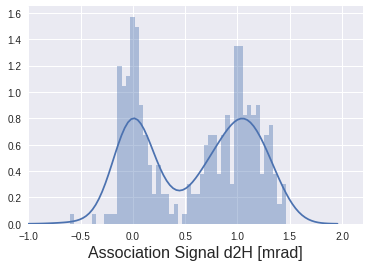

In [116]:
sns.distplot(aggregated['Assoc Signal mean'] * 1000, bins = 50)
# sns.distplot(aggregated['Assoc Signal max'] * 1000, bins = 50)
plt.xlim(-1, 2.2)
plt.xlabel('Association Signal d2H [mrad]', fontsize = 16)

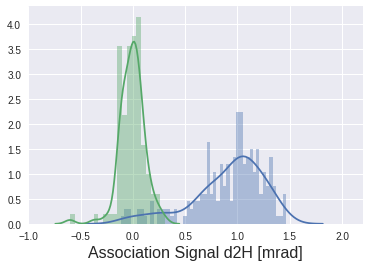

In [118]:
contains_HPQM_agg = aggregated['Peptide'].str.contains(r'HP[QM]')
sns.distplot(aggregated[contains_HPQM_agg]['Assoc Signal mean'] * 1000, bins = 50)
sns.distplot(aggregated[~contains_HPQM_agg]['Assoc Signal mean'] * 1000, bins = 20)
plt.xlim(-1, 2.2)
plt.xlabel('Association Signal d2H [mrad]', fontsize = 16)

We have to impose Kd* = 30000 nM = 30 uM = 0.00003 M on non-reactive spots rather than use fit result.


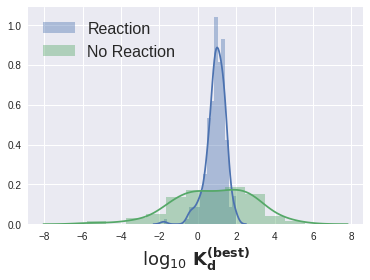

In [119]:
snr_threshold   = 2
scale_threshold = 0.0004

aggregated['Reaction'] = (aggregated['Assoc SNR max'] > snr_threshold) & \
                         (aggregated['Scale max'] > scale_threshold)

sns.distplot(np.log10(aggregated[ aggregated['Reaction']]['Kd best']), label =   'Reaction')
sns.distplot(np.log10(aggregated[~aggregated['Reaction']]['Kd best']), label ='No Reaction')
plt.xlabel('$\log_{10}\mathbf{\ K_d^{(best)}}}$', fontsize = 18)
plt.legend(fontsize = 16, loc = 2)
print 'We have to impose Kd* = 30000 nM = 30 uM = 0.00003 M on non-reactive spots rather than use fit result.'

In [120]:
reacted = aggregated[aggregated['Reaction']]

print 'Peptides with kon < Err(kon)'
reacted[reacted['kon']  < reacted['kon Err']]['Peptide']

Peptides with kon < Err(kon)


32     LQCHPQAGK
129    LQWHPQNGK
Name: Peptide, dtype: object

In [121]:
print 'Peptides with koff < Err(koff)'
reacted[reacted['koff']  < reacted['koff Err']]['Peptide']

Peptides with koff < Err(koff)


264     WTHPQFHT
115    LQWHPQATK
116    LQWHPQAVK
129    LQWHPQNGK
Name: Peptide, dtype: object

In [123]:
print 'Peptides with Kd_best < Err(Kd)'
reacted[reacted['Kd best'] < reacted['Kd Err']]['Peptide']

Peptides with Kd_best < Err(Kd)


32     LQCHPQAGK
129    LQWHPQNGK
Name: Peptide, dtype: object

In [134]:
nonreactive_kd  = 3 * 10**(-5)

# create final Kd, lower and upper bounds
print 'There are', len(aggregated), 'peptides in the data set.\n'
aggregated['Kd Final Lower'] = aggregated['Kd best'] - aggregated['Kd Err']
aggregated['Kd Final']       = aggregated['Kd best']
aggregated['Kd Final Upper'] = aggregated['Kd best'] + aggregated['Kd Err']

# for non-reactive peptides, Kd_lower = Kd = nonreactive_kd, Kd_upper = inf
print 'There are', sum(~aggregated['Reaction']), 'non-reactive petides among them.\n'
aggregated.loc[~aggregated['Reaction'], 'Kd Final Lower'] = nonreactive_kd
aggregated.loc[~aggregated['Reaction'], 'Kd Final']       = nonreactive_kd
aggregated.loc[~aggregated['Reaction'], 'Kd Final Upper'] = np.inf

# for reactive peptides with Kd_best > Kd, set Kd_lower = 0, Kd = Kd_upper = Kd_best
to_filter = (aggregated['Kd best'] > aggregated['Kd fit']) & aggregated['Reaction']
print 'There are', sum(to_filter), 'reactive peptides with Kd_best > Kd_fit.'
print 'For them we report Kd_best as an upper bound of Kd and 1/Kd_best as lower bound of Ka.\n'
aggregated.loc[to_filter, 'Kd Final Lower'] = 0
aggregated.loc[to_filter, 'Kd Final']       = aggregated.loc[to_filter, 'Kd best']
aggregated.loc[to_filter, 'Kd Final Upper'] = aggregated.loc[to_filter, 'Kd best']
    
# if Kd_lower < 0, set it to 0. Set Kd and Kd_upper to Kd + Err(Kd)
to_filter = (aggregated['Kd Final Lower'] < 0) & aggregated['Reaction']
print 'There are', sum(to_filter), 'reactive peptides left with Kd_lower < 0.'
print 'For these peptides we report Kd + Err(Kd) as upper bound of Kd and 1/(Kd + Err(Kd)) as lower bound of Ka.'
print 'Here are these peptides:'
display( aggregated[to_filter][['Peptide',
                                'kon',     'kon Err',
                                'koff',    'koff Err',
                                'Kd best', 'Kd Err',
                                'Assoc SNR max', 'Scale max']] )

aggregated.loc[to_filter, 'Kd Final Lower'] = 0
aggregated.loc[to_filter, 'Kd Final']       = aggregated.loc[to_filter, 'Kd best'] + \
                                              aggregated.loc[to_filter, 'Kd Err']
aggregated.loc[to_filter, 'Kd Final Upper'] = aggregated.loc[to_filter, 'Kd best'] + \
                                              aggregated.loc[to_filter, 'Kd Err']
    
# create Ka, lower and upper bounds
aggregated['Ka Final Lower'] = 1 / aggregated['Kd Final Upper']
aggregated['Ka Final']       = 1 / aggregated['Kd Final']
aggregated['Ka Final Upper'] = 1 / aggregated['Kd Final Lower']

There are 324 peptides in the data set.

There are 135 non-reactive petides among them.

There are 9 reactive peptides with Kd_best > Kd_fit.
For them we report Kd_best as an upper bound of Kd and 1/Kd_best as lower bound of Ka.

There are 0 reactive peptides left with Kd_lower < 0.
For these peptides we report Kd + Err(Kd) as upper bound of Kd and 1/(Kd + Err(Kd)) as lower bound of Ka.
Here are these peptides:


,Peptide,kon,kon Err,koff,koff Err,Kd best,Kd Err,Assoc SNR max,Scale max


In [135]:
aggregated.to_csv('00 Aggregated dR RT Streptavidin length 8 and 9.csv', index = False)